In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
0246c5d (Thu Jan 25 17:01:47 2018 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3, venn2

from herschelhelp_internal.masterlist import (nb_compare_mags, nb_ccplots, nb_histograms, 
                                              quick_checks, find_last_ml_suffix)

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "master_catalogue_gama-12_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_gama-12_20180129.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(208, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(208, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

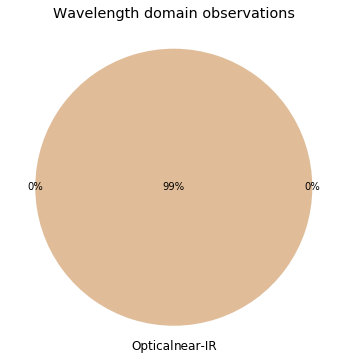

In [6]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 3)
    ],
    set_labels=('Optical', 'near-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

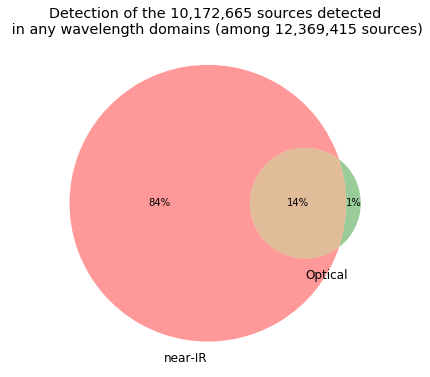

In [7]:
venn2(
    [
        np.sum(flag_det[flag_obs == 3] == 1),
        np.sum(flag_det[flag_obs == 3] == 2),
        np.sum(flag_det[flag_obs == 3] == 3)
    ],
    set_labels=('near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = [           "Omegacam u"]
g_bands = ["DECam g", "Omegacam g", "SUPRIME g", "GPC1 g"]
r_bands = ["DECam r", "Omegacam r", "SUPRIME r", "GPC1 r"]
i_bands = [           "Omegacam i", "SUPRIME i", "GPC1 i"]
z_bands = ["DECam z",               "SUPRIME z", "GPC1 z"]
y_bands = [                         "SUPRIME y", "GPC1 y"]

In [9]:
for band in g_bands:
    print(band, 'max:', np.nanmax(master_catalogue["m_{}".format(band.replace(" ", "_").lower())]))

DECam g max: 39.3524
Omegacam g max: 43.5271
SUPRIME g max: nan
GPC1 g max: 34.7890014648


/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:355: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)


The Suprime g magnitudes are very wrong. They are almost all between 0 and 1.

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

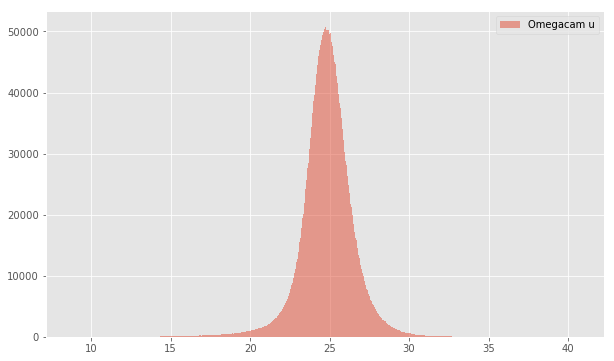

HELP warning: the column m_suprime_g (SUPRIME g) is empty.


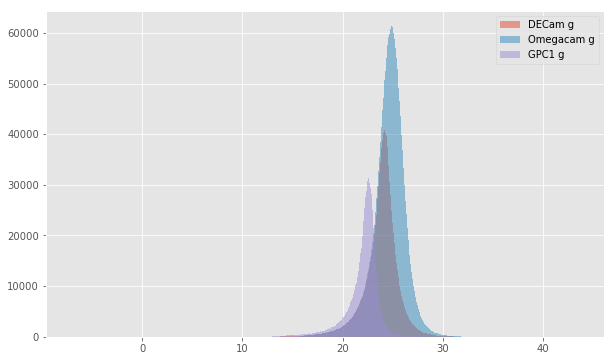

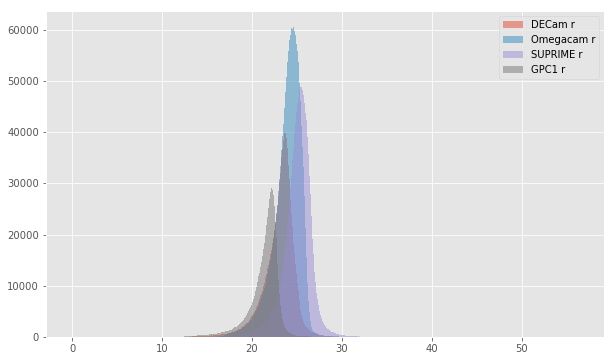

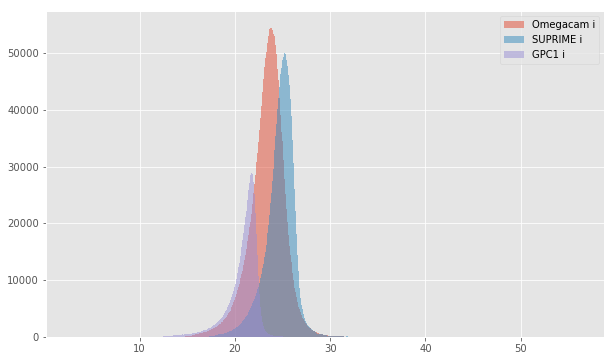

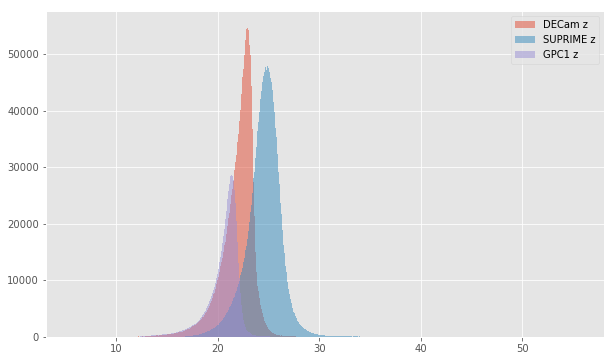

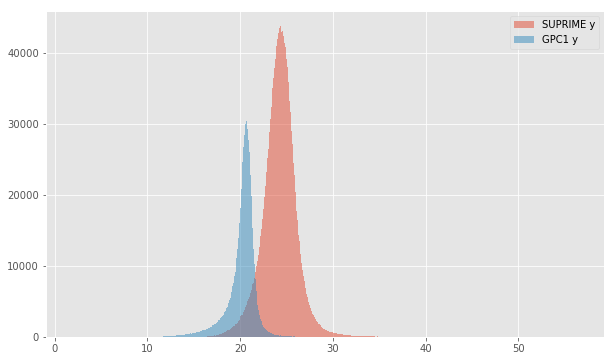

In [10]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

Omegacam g (aperture) - DECam g (aperture):
- Median: 0.24
- Median Absolute Deviation: 0.28
- 1% percentile: -2.421456756591797
- 99% percentile: 1.7177793884277346


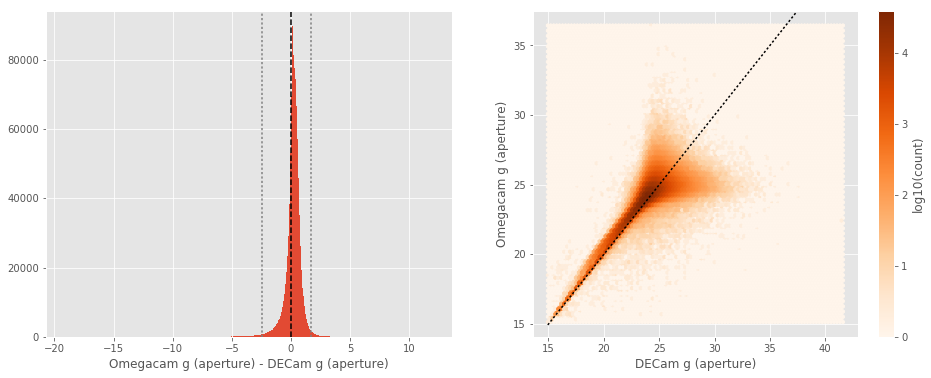

Omegacam g (total) - DECam g (total):
- Median: 0.12
- Median Absolute Deviation: 0.24
- 1% percentile: -1.9983771514892579
- 99% percentile: 2.143661956787107


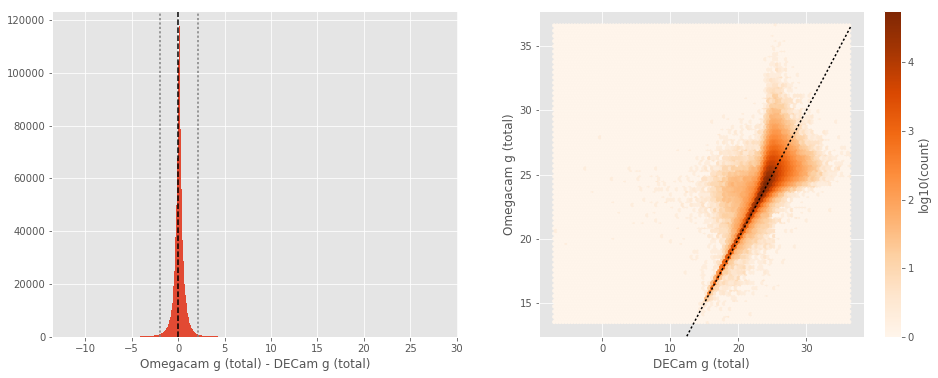

SUPRIME g (aperture) - DECam g (aperture):
- Median: 0.11
- Median Absolute Deviation: 0.28
- 1% percentile: -2.5734726333618165
- 99% percentile: 1.9980712890625032


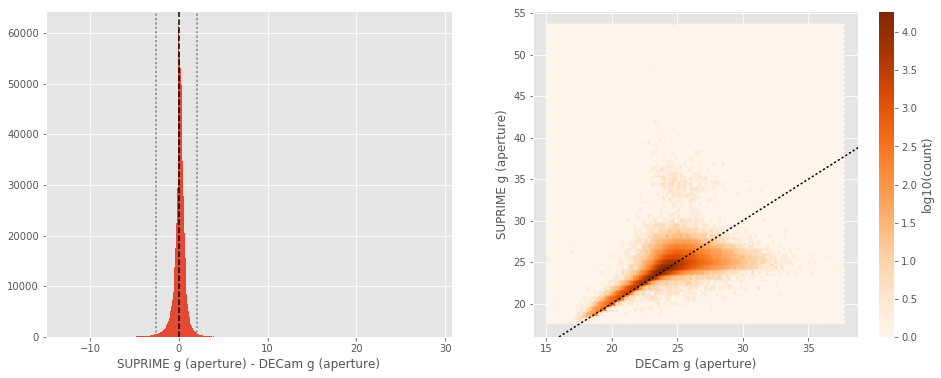

No sources have both DECam g (total) and SUPRIME g (total) values.
GPC1 g (aperture) - DECam g (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.28
- 1% percentile: -3.323600387573242
- 99% percentile: 2.2757487106323264


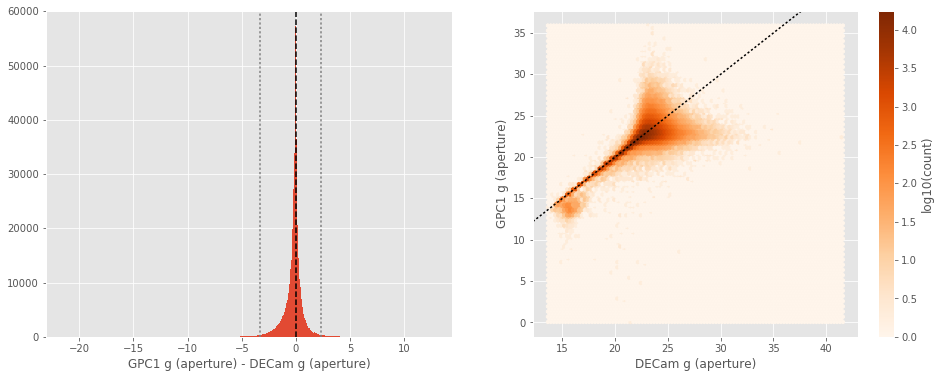

GPC1 g (total) - DECam g (total):
- Median: -0.00
- Median Absolute Deviation: 0.26
- 1% percentile: -3.400665760040283
- 99% percentile: 2.0117679786682143


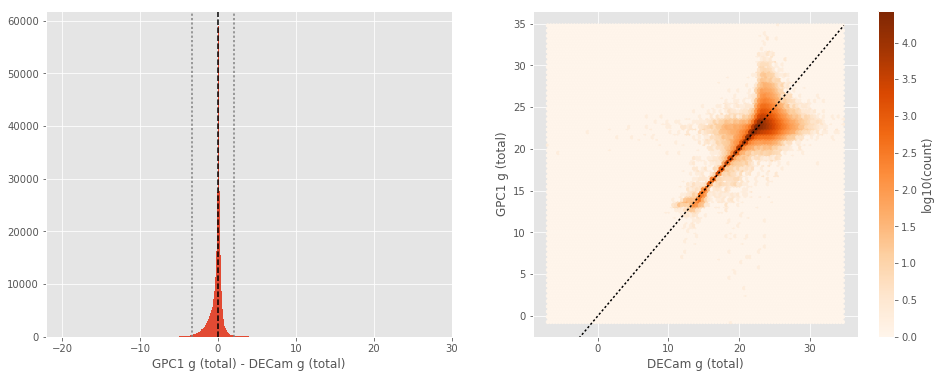

SUPRIME g (aperture) - Omegacam g (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.17
- 1% percentile: -1.7694091796874998
- 99% percentile: 1.1416382789611785


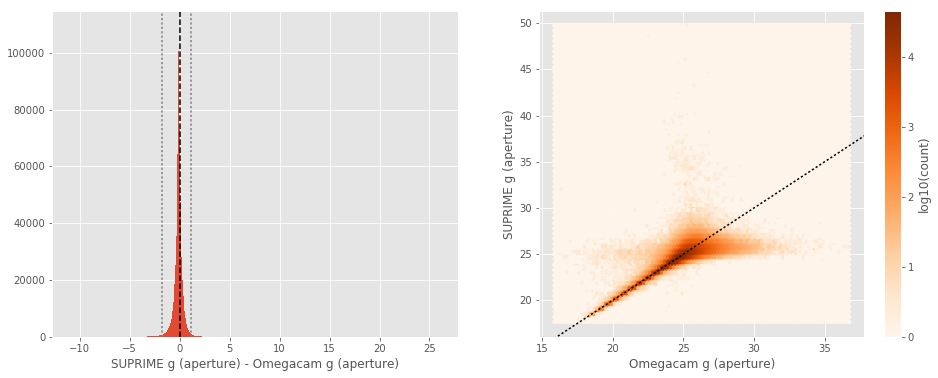

No sources have both Omegacam g (total) and SUPRIME g (total) values.
GPC1 g (aperture) - Omegacam g (aperture):
- Median: -0.40
- Median Absolute Deviation: 0.38
- 1% percentile: -2.9983723831176756
- 99% percentile: 2.0907281112671225


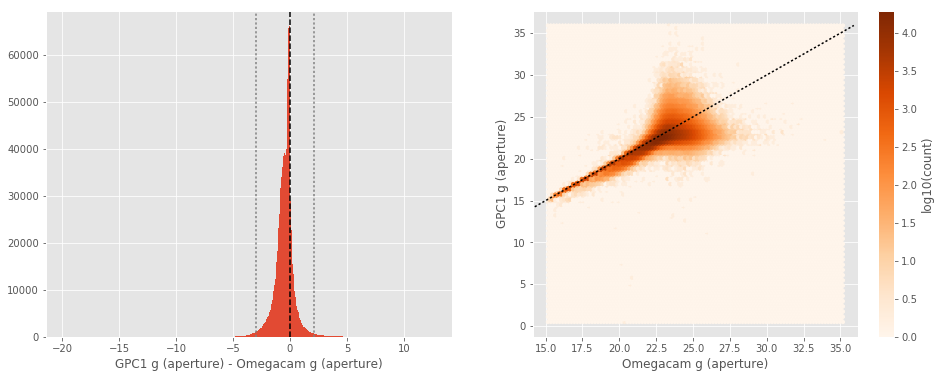

GPC1 g (total) - Omegacam g (total):
- Median: -0.12
- Median Absolute Deviation: 0.25
- 1% percentile: -3.3798369407653808
- 99% percentile: 1.5962666130065895


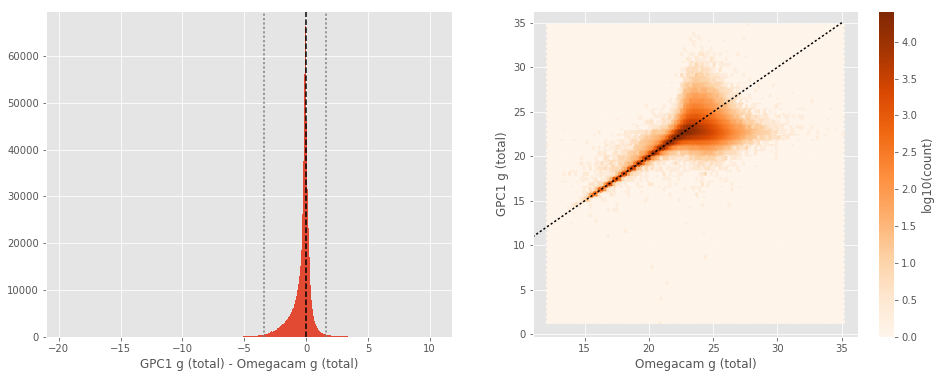

GPC1 g (aperture) - SUPRIME g (aperture):
- Median: -0.33
- Median Absolute Deviation: 0.40
- 1% percentile: -3.0280526733398436
- 99% percentile: 2.2830573272705097


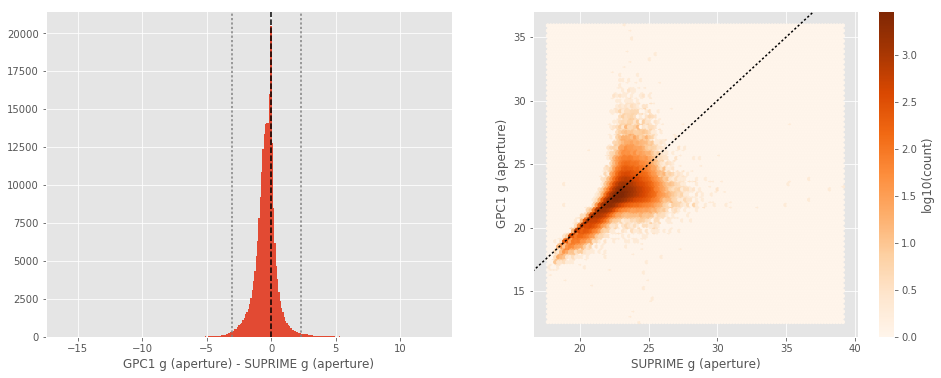

No sources have both SUPRIME g (total) and GPC1 g (total) values.
Omegacam r (aperture) - DECam r (aperture):
- Median: 0.25
- Median Absolute Deviation: 0.24
- 1% percentile: -2.223689575195312
- 99% percentile: 1.2501894378662115


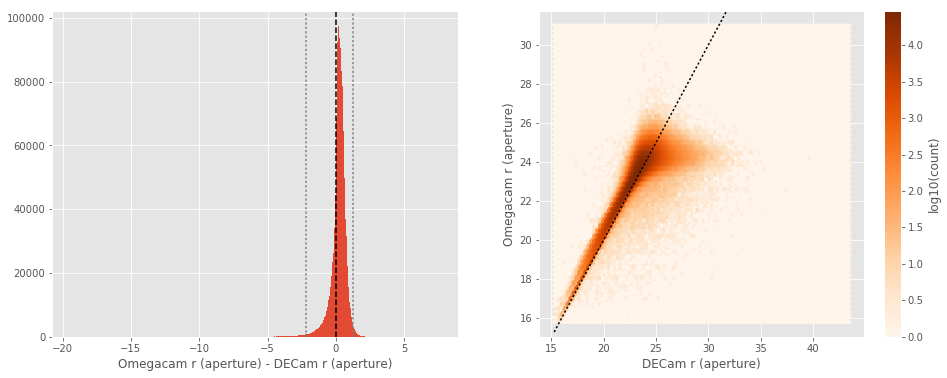

Omegacam r (total) - DECam r (total):
- Median: 0.17
- Median Absolute Deviation: 0.18
- 1% percentile: -1.2137767791748046
- 99% percentile: 1.5382007598877045


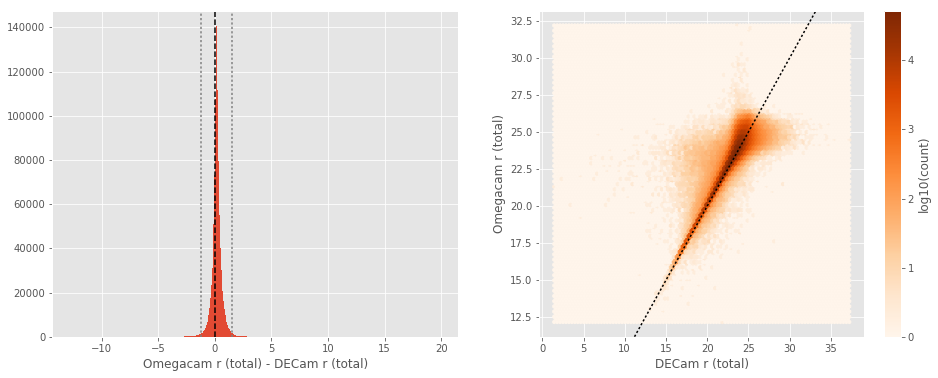

SUPRIME r (aperture) - DECam r (aperture):
- Median: 0.19
- Median Absolute Deviation: 0.26
- 1% percentile: -2.5148622894287107
- 99% percentile: 1.5698329162597655


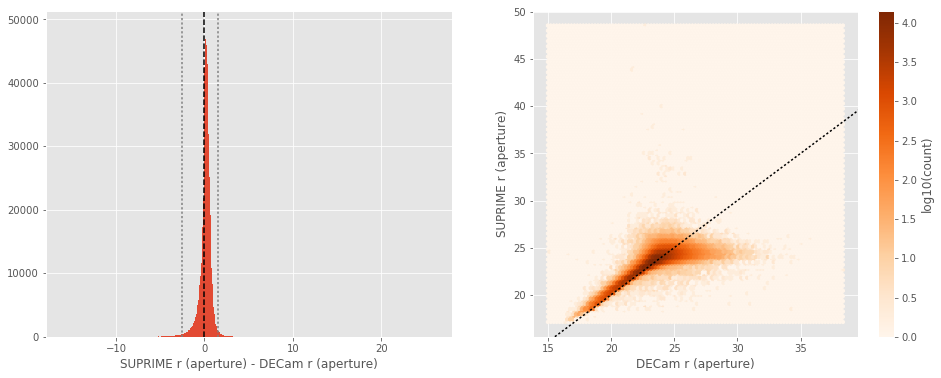

SUPRIME r (total) - DECam r (total):
- Median: -0.00
- Median Absolute Deviation: 0.19
- 1% percentile: -1.8438291549682617
- 99% percentile: 1.7042064666748047


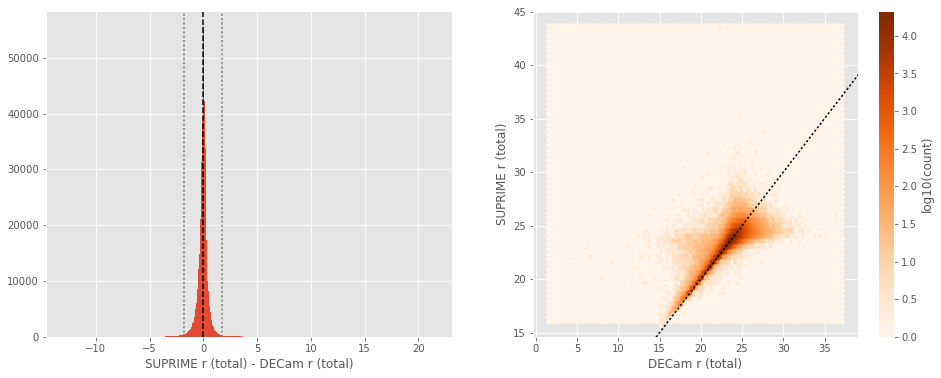

GPC1 r (aperture) - DECam r (aperture):
- Median: 0.10
- Median Absolute Deviation: 0.17
- 1% percentile: -2.1499901390075684
- 99% percentile: 1.7801751708984375


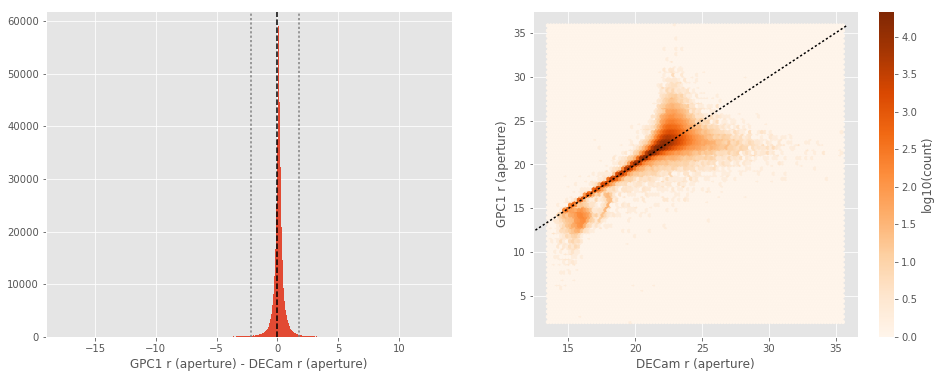

GPC1 r (total) - DECam r (total):
- Median: 0.21
- Median Absolute Deviation: 0.15
- 1% percentile: -1.3948646545410157
- 99% percentile: 1.6864162445068303


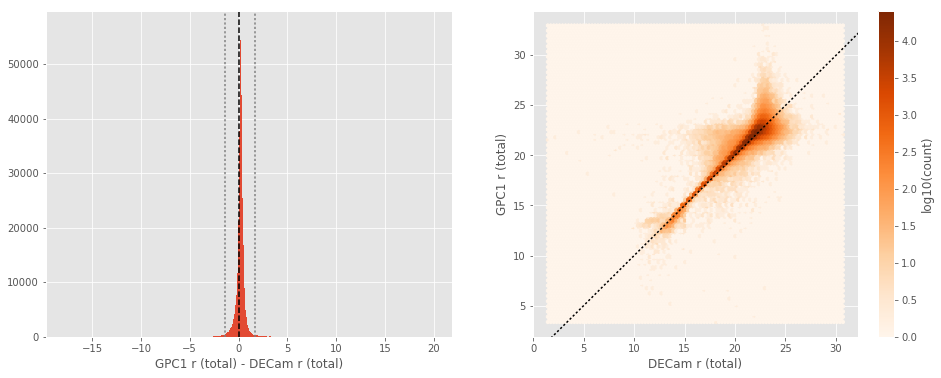

SUPRIME r (aperture) - Omegacam r (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8898246765136719
- 99% percentile: 0.9822139739990225


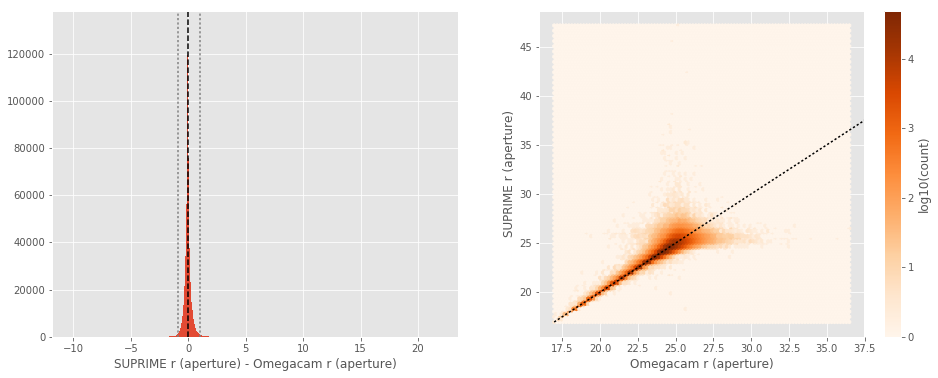

SUPRIME r (total) - Omegacam r (total):
- Median: -0.21
- Median Absolute Deviation: 0.19
- 1% percentile: -1.4218847274780273
- 99% percentile: 1.2361030578613281


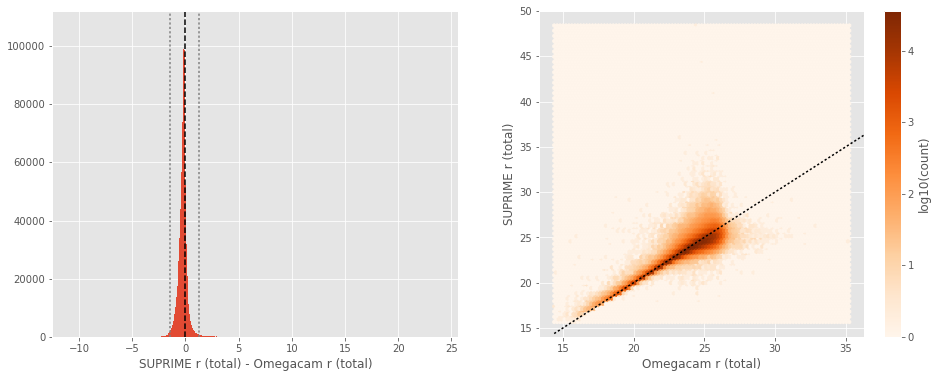

GPC1 r (aperture) - Omegacam r (aperture):
- Median: -0.19
- Median Absolute Deviation: 0.24
- 1% percentile: -1.4279033660888671
- 99% percentile: 1.5094874382019094


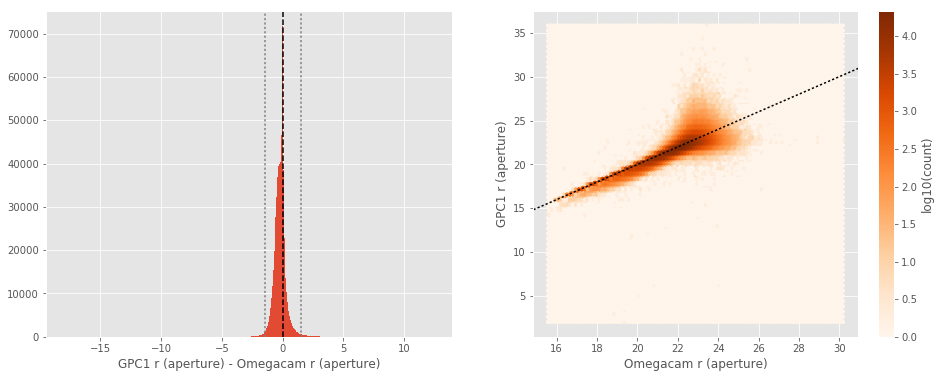

GPC1 r (total) - Omegacam r (total):
- Median: 0.05
- Median Absolute Deviation: 0.13
- 1% percentile: -1.5332369995117188
- 99% percentile: 1.0504807281494113


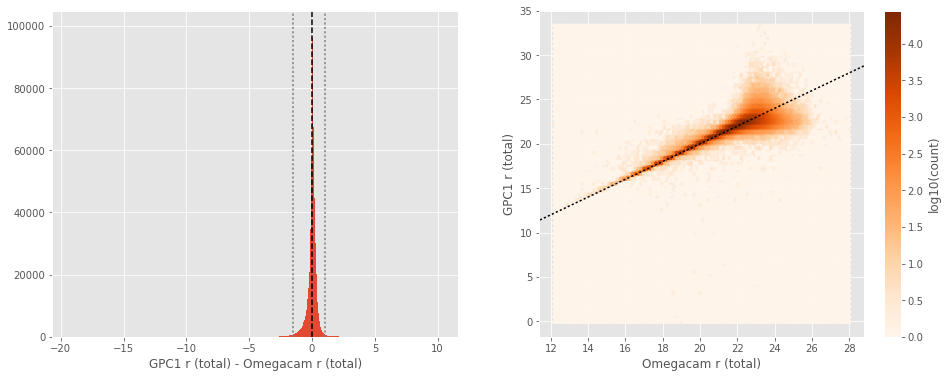

GPC1 r (aperture) - SUPRIME r (aperture):
- Median: -0.16
- Median Absolute Deviation: 0.25
- 1% percentile: -1.6482121086120607
- 99% percentile: 1.5769341278076159


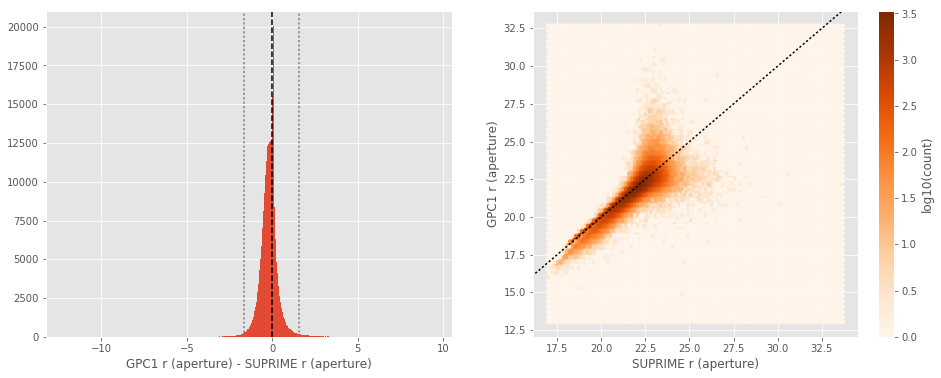

GPC1 r (total) - SUPRIME r (total):
- Median: 0.14
- Median Absolute Deviation: 0.15
- 1% percentile: -1.601072483062744
- 99% percentile: 1.1306134033203126


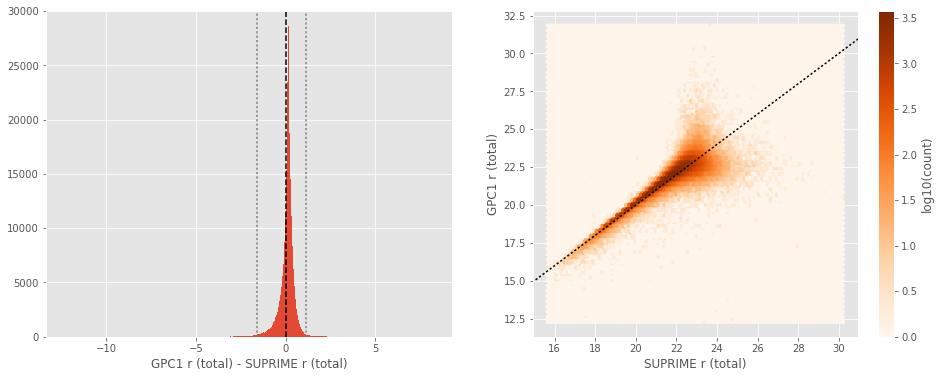

SUPRIME i (aperture) - Omegacam i (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.21
- 1% percentile: -2.0993301010131837
- 99% percentile: 1.3187004470825237


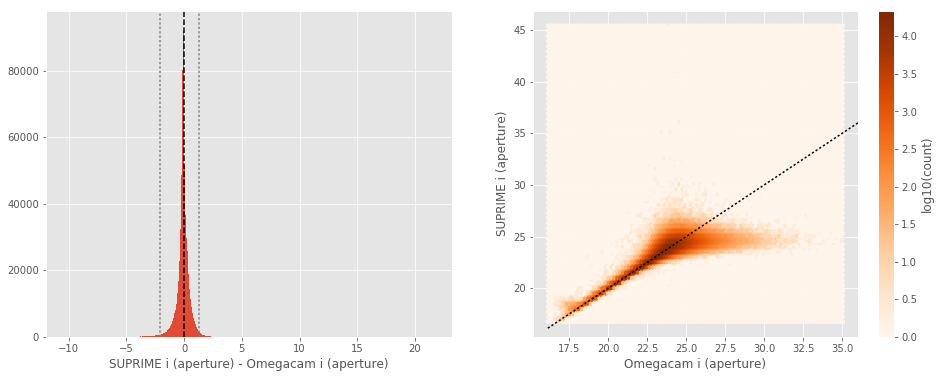

SUPRIME i (total) - Omegacam i (total):
- Median: -0.30
- Median Absolute Deviation: 0.30
- 1% percentile: -3.1144363403320314
- 99% percentile: 1.3730266189575193


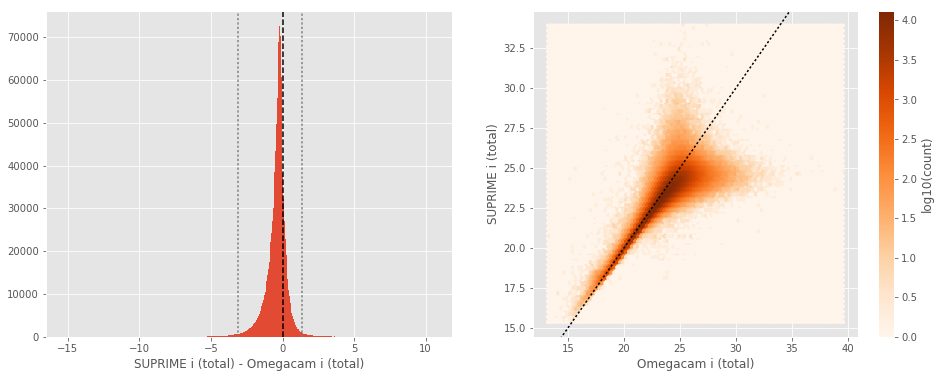

GPC1 i (aperture) - Omegacam i (aperture):
- Median: -0.15
- Median Absolute Deviation: 0.19
- 1% percentile: -1.0921630859375
- 99% percentile: 0.942601203918457


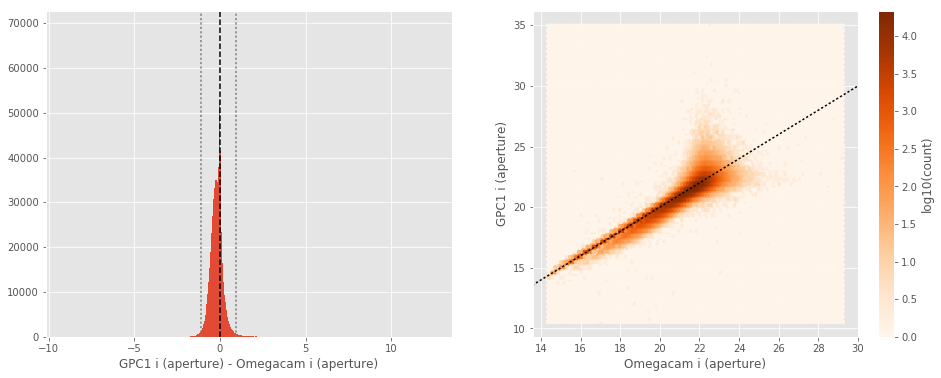

GPC1 i (total) - Omegacam i (total):
- Median: 0.04
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9394100379943848
- 99% percentile: 0.7289270019531244


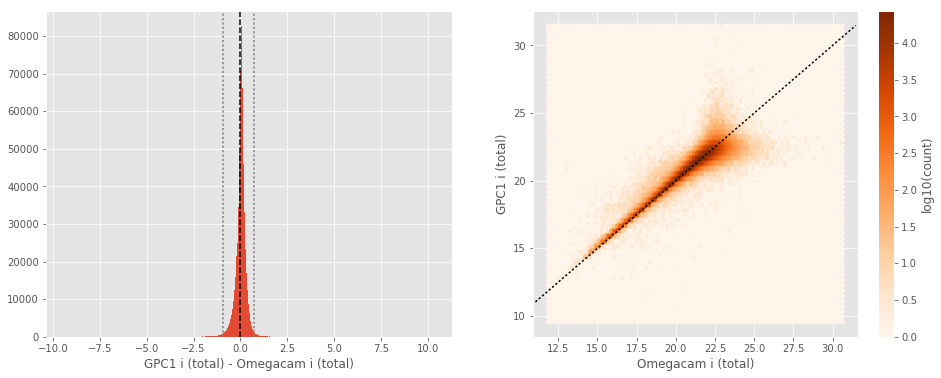

GPC1 i (aperture) - SUPRIME i (aperture):
- Median: -0.09
- Median Absolute Deviation: 0.20
- 1% percentile: -1.2597021865844726
- 99% percentile: 0.9451037597656242


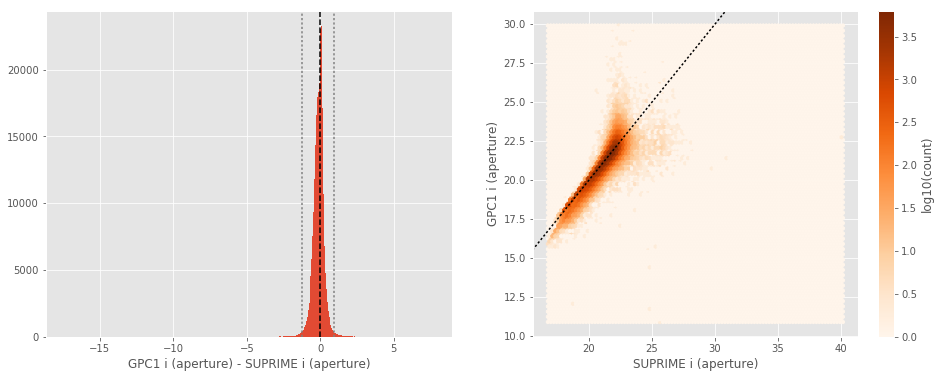

GPC1 i (total) - SUPRIME i (total):
- Median: 0.20
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9388385772705078
- 99% percentile: 0.7898092269897459


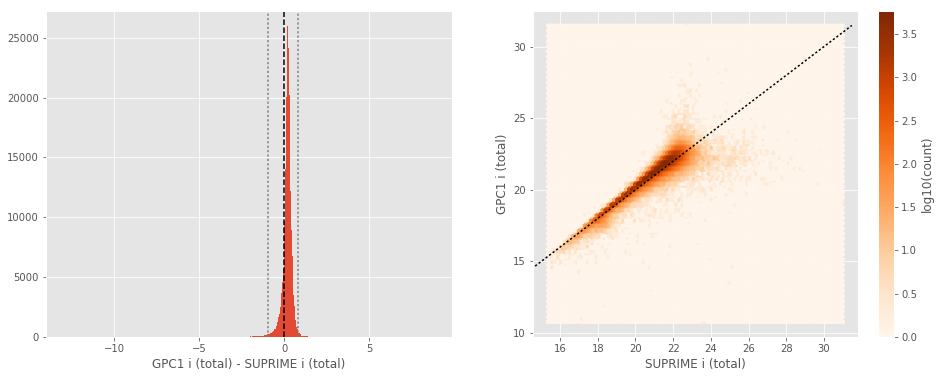

SUPRIME z (aperture) - DECam z (aperture):
- Median: 0.14
- Median Absolute Deviation: 0.20
- 1% percentile: -1.7197685241699219
- 99% percentile: 1.3337068557739267


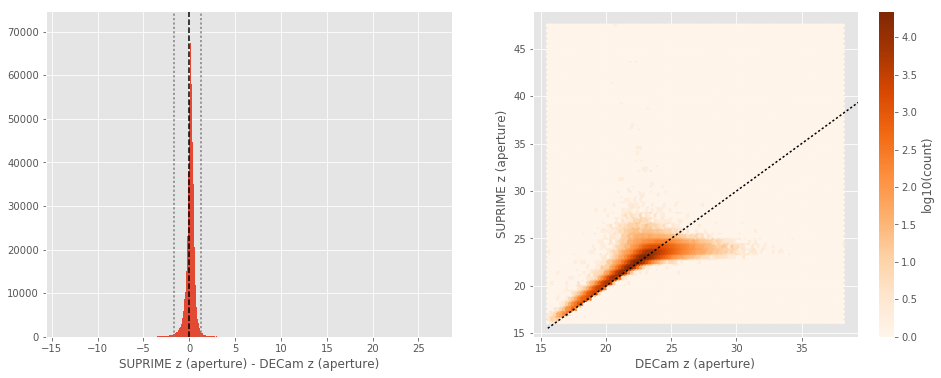

SUPRIME z (total) - DECam z (total):
- Median: 0.02
- Median Absolute Deviation: 0.14
- 1% percentile: -0.8981622886657715
- 99% percentile: 1.4719318771362397


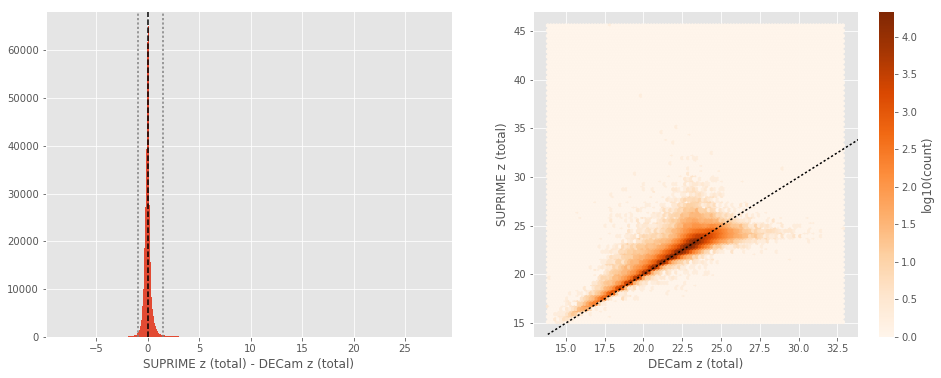

GPC1 z (aperture) - DECam z (aperture):
- Median: 0.13
- Median Absolute Deviation: 0.12
- 1% percentile: -1.197961082458496
- 99% percentile: 1.1379787445068388


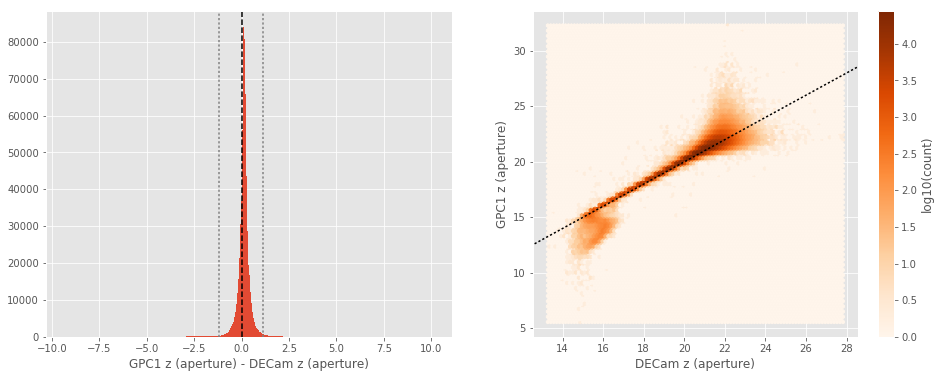

GPC1 z (total) - DECam z (total):
- Median: 0.25
- Median Absolute Deviation: 0.12
- 1% percentile: -0.7122621345520018
- 99% percentile: 1.3096992492675792


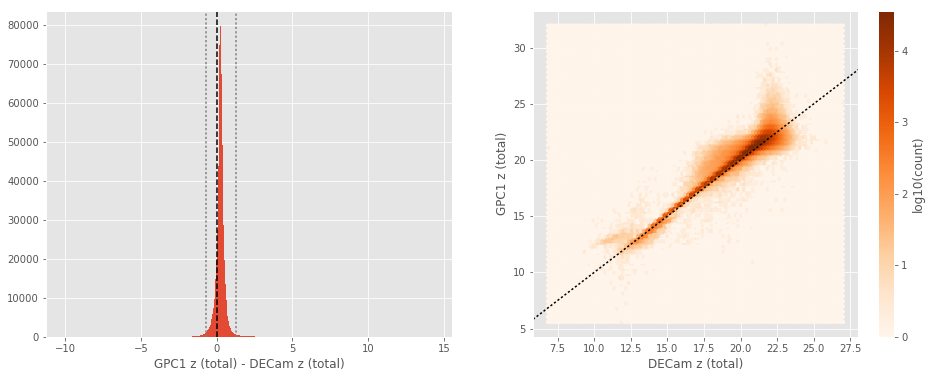

GPC1 z (aperture) - SUPRIME z (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.21
- 1% percentile: -1.1804688262939453
- 99% percentile: 1.0268697357177732


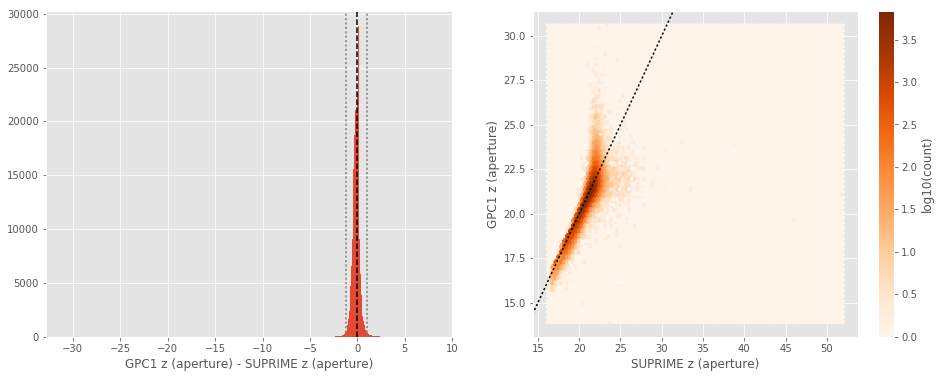

GPC1 z (total) - SUPRIME z (total):
- Median: 0.17
- Median Absolute Deviation: 0.13
- 1% percentile: -0.9890042114257812
- 99% percentile: 0.8573753738403318


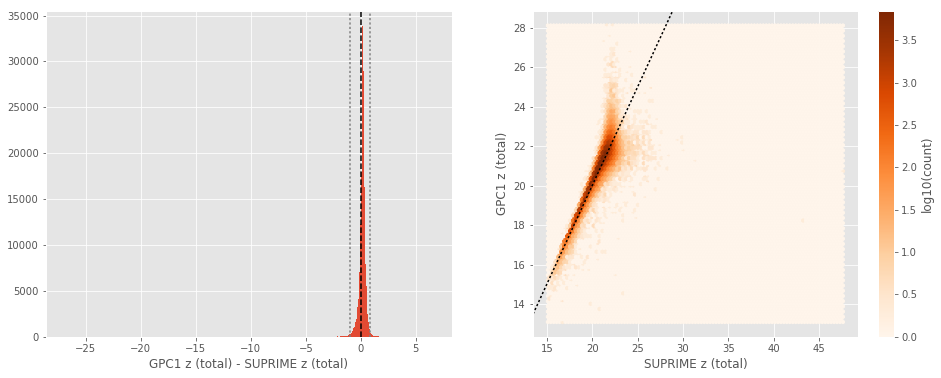

GPC1 y (aperture) - SUPRIME y (aperture):
- Median: -0.27
- Median Absolute Deviation: 0.32
- 1% percentile: -1.9547522544860838
- 99% percentile: 1.80585403442383


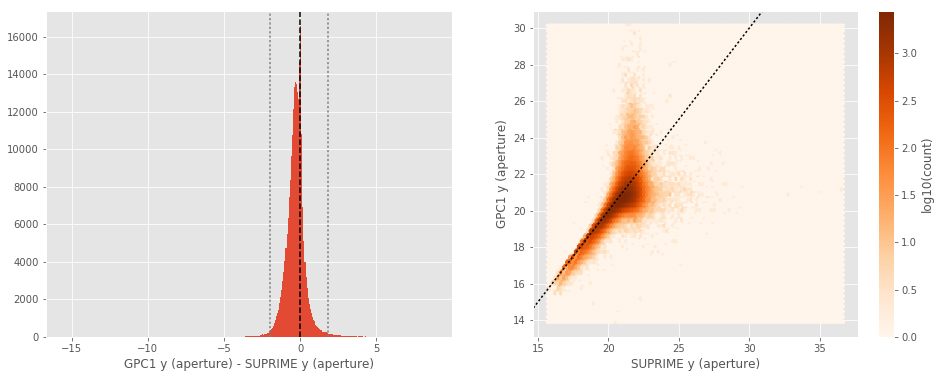

GPC1 y (total) - SUPRIME y (total):
- Median: 0.07
- Median Absolute Deviation: 0.27
- 1% percentile: -2.1251942443847653
- 99% percentile: 1.7523292541503808


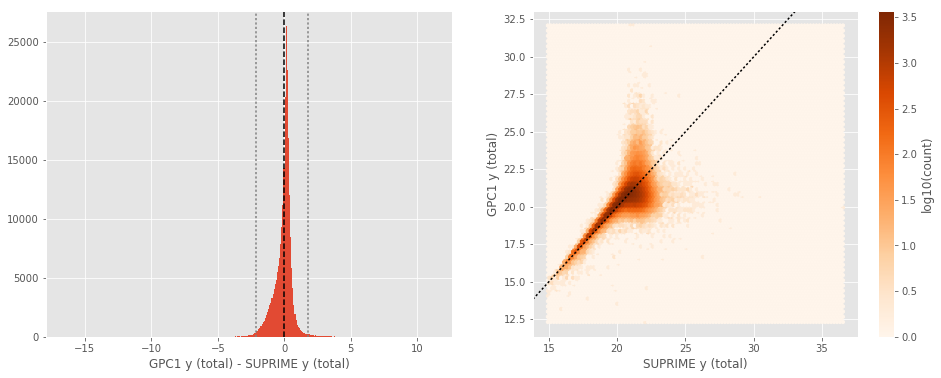

In [11]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [12]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [13]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_GAMA-12.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

Omegacam u (aperture) - SDSS u (fiberMag):
- Median: 0.10
- Median Absolute Deviation: 0.42
- 1% percentile: -1.6068706512451172
- 99% percentile: 2.9546961784362793


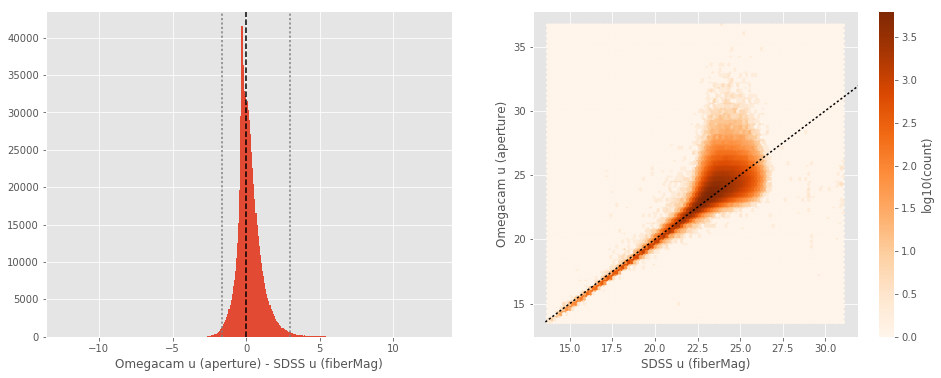

Omegacam u (total) - SDSS u (petroMag):
- Median: 0.24
- Median Absolute Deviation: 0.74
- 1% percentile: -4.01983835220337
- 99% percentile: 4.290471172332764


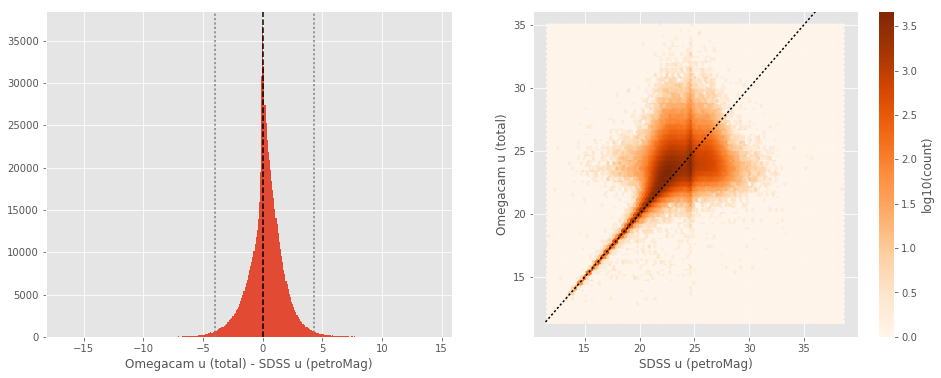

DECam g (aperture) - SDSS g (fiberMag):
- Median: -0.44
- Median Absolute Deviation: 0.16
- 1% percentile: -1.2985469055175782
- 99% percentile: 1.6975757598876973


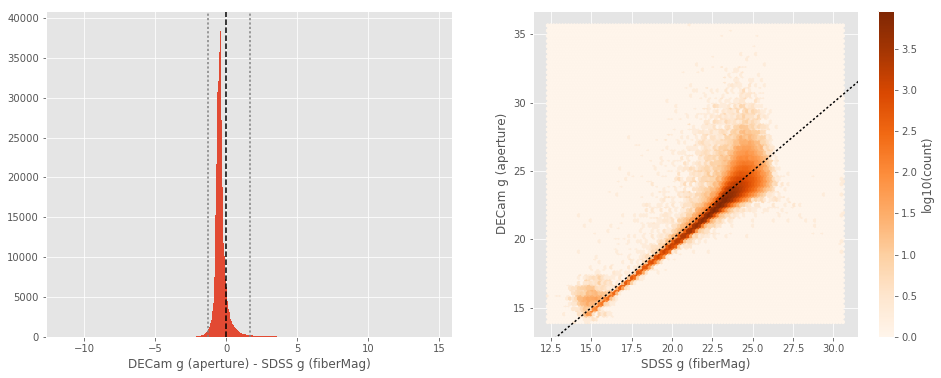

DECam g (total) - SDSS g (petroMag):
- Median: -0.09
- Median Absolute Deviation: 0.24
- 1% percentile: -3.5824387550354
- 99% percentile: 1.9483854293823195


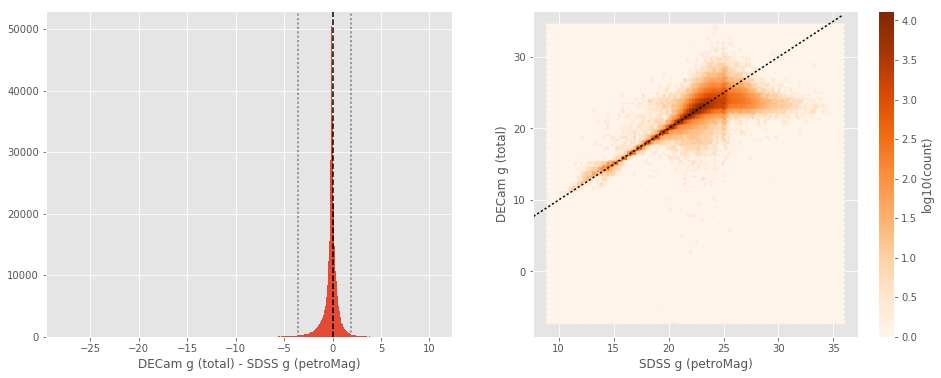

Omegacam g (aperture) - SDSS g (fiberMag):
- Median: -0.17
- Median Absolute Deviation: 0.16
- 1% percentile: -0.989033203125
- 99% percentile: 1.033982009887696


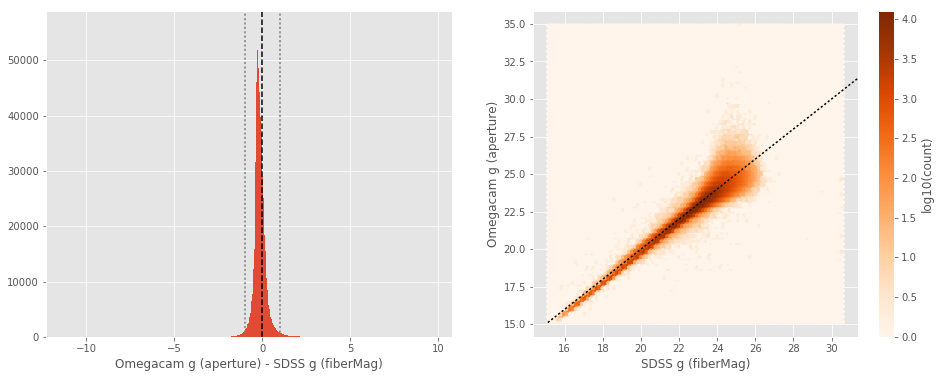

Omegacam g (total) - SDSS g (petroMag):
- Median: 0.02
- Median Absolute Deviation: 0.24
- 1% percentile: -3.2796149826049805
- 99% percentile: 1.9078044891357422


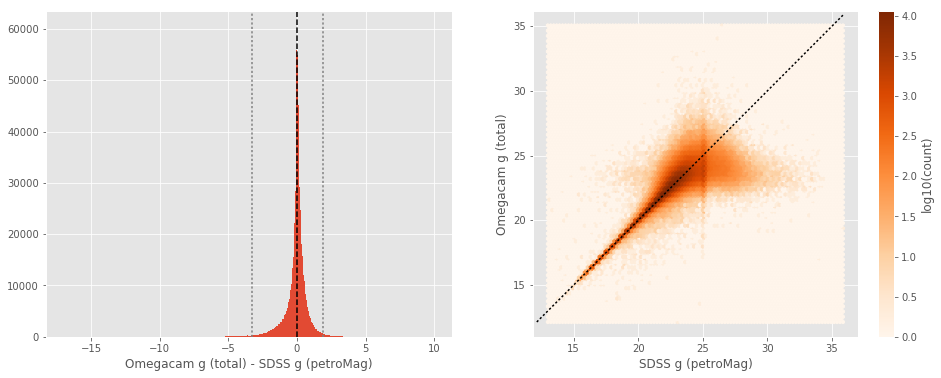

SUPRIME g (aperture) - SDSS g (fiberMag):
- Median: -0.27
- Median Absolute Deviation: 0.17
- 1% percentile: -1.121074981689453
- 99% percentile: 1.001533355712892


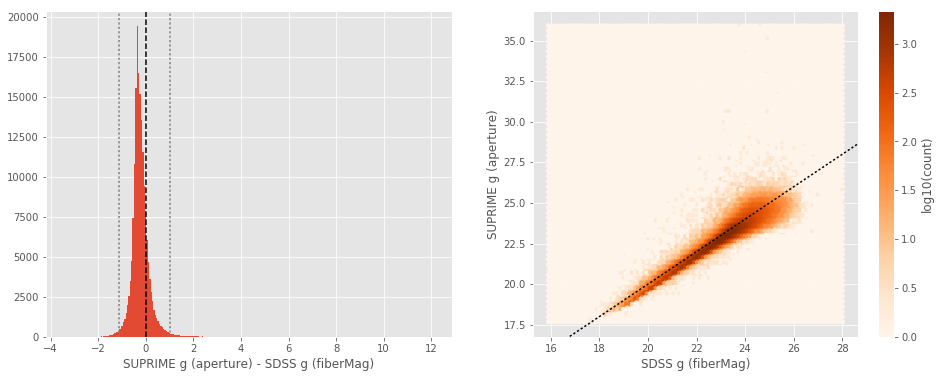

No sources have both SDSS g (petroMag) and SUPRIME g (total) values.
GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.53
- Median Absolute Deviation: 0.27
- 1% percentile: -2.5304904174804688
- 99% percentile: 1.800501060485837


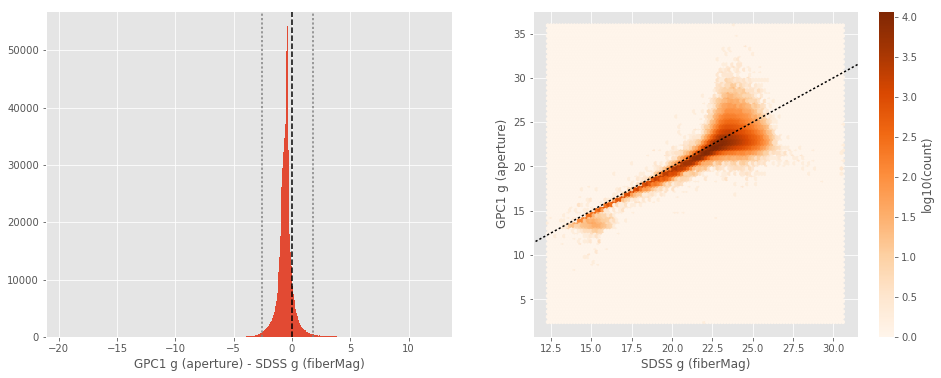

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.08
- Median Absolute Deviation: 0.26
- 1% percentile: -4.119427013397217
- 99% percentile: 1.6508738517761201


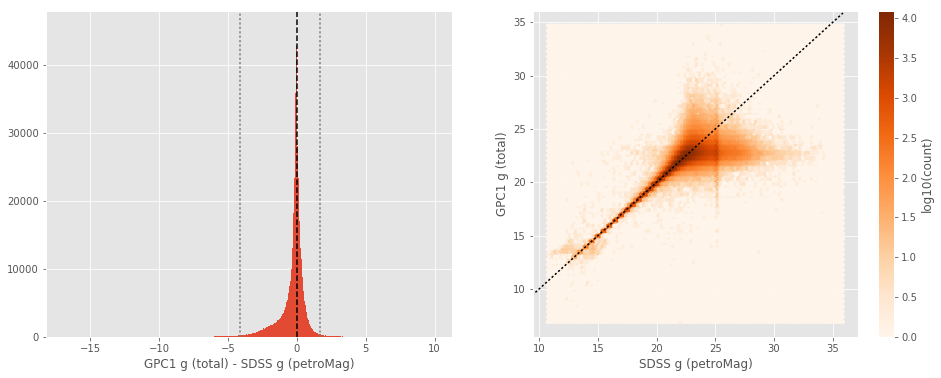

DECam r (aperture) - SDSS r (fiberMag):
- Median: -0.53
- Median Absolute Deviation: 0.13
- 1% percentile: -1.2202922821044921
- 99% percentile: 0.988734893798829


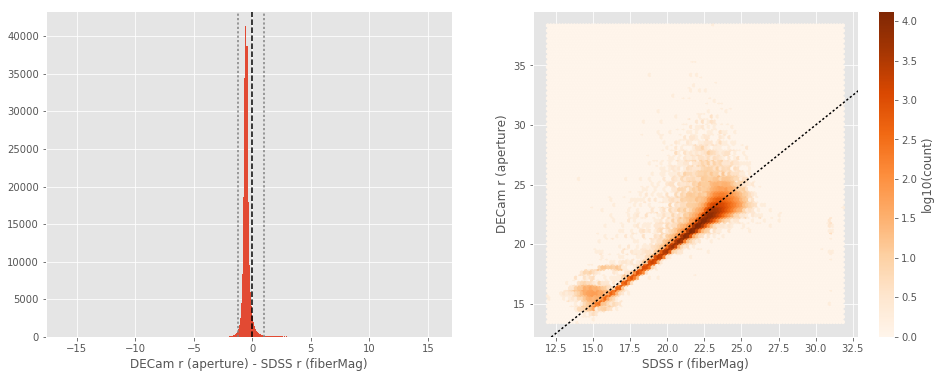

DECam r (total) - SDSS r (petroMag):
- Median: -0.16
- Median Absolute Deviation: 0.17
- 1% percentile: -3.014034652709961
- 99% percentile: 1.0932461166381828


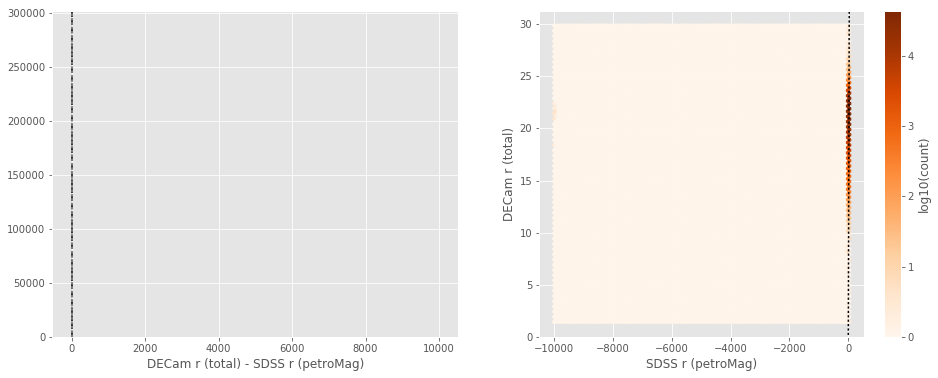

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in less


Omegacam r (aperture) - SDSS r (fiberMag):
- Median: -0.23
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8954694747924804
- 99% percentile: 0.42119455337524436


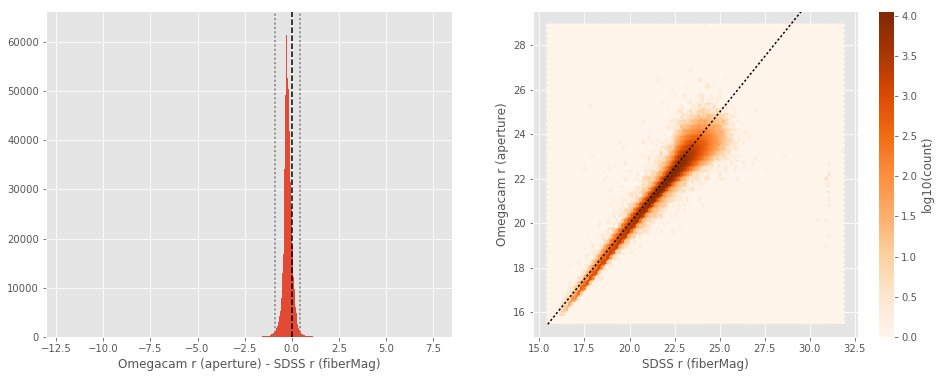

Omegacam r (total) - SDSS r (petroMag):
- Median: -0.01
- Median Absolute Deviation: 0.15
- 1% percentile: -2.604570159912109
- 99% percentile: 1.2320273399353003


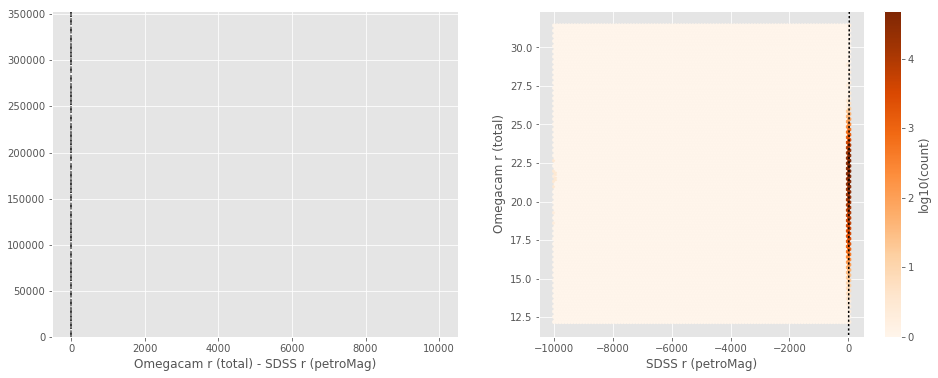

SUPRIME r (aperture) - SDSS r (fiberMag):
- Median: -0.26
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9513585090637208
- 99% percentile: 0.6181533622741703


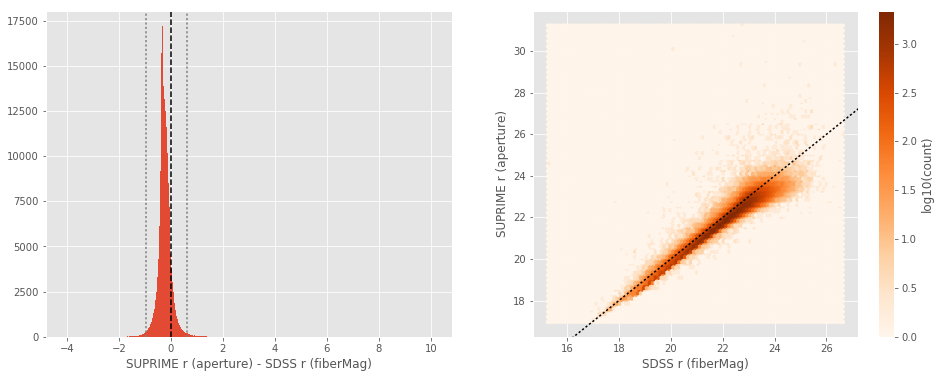

SUPRIME r (total) - SDSS r (petroMag):
- Median: -0.09
- Median Absolute Deviation: 0.17
- 1% percentile: -2.7216490936279296
- 99% percentile: 1.199208831787109


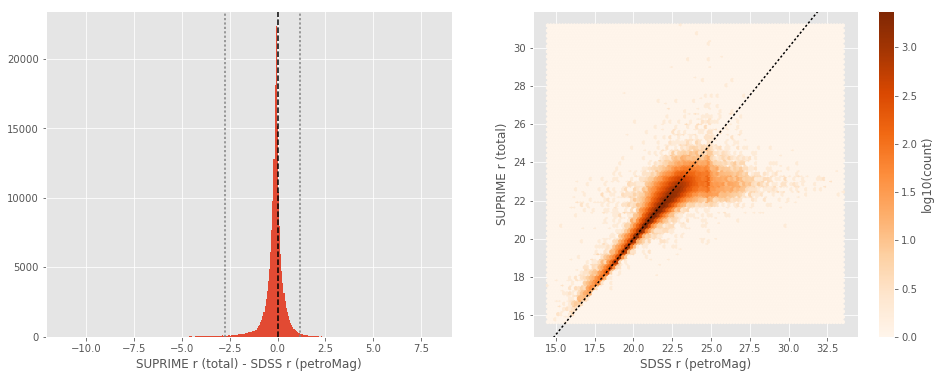

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.41
- Median Absolute Deviation: 0.17
- 1% percentile: -1.506801357269287
- 99% percentile: 1.0024491882324256


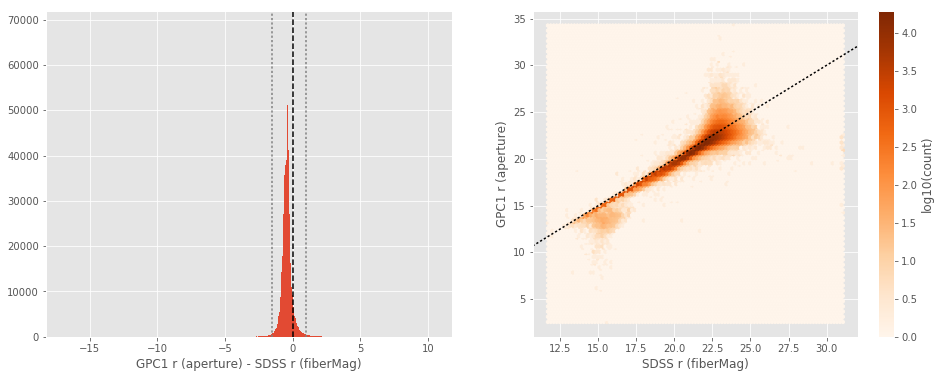

GPC1 r (total) - SDSS r (petroMag):
- Median: 0.05
- Median Absolute Deviation: 0.15
- 1% percentile: -2.472001113891601
- 99% percentile: 1.208791007995603


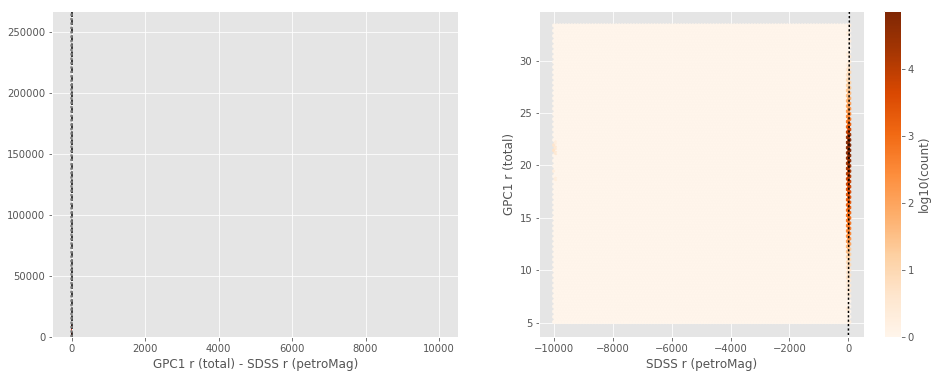

Omegacam i (aperture) - SDSS i (fiberMag):
- Median: -0.22
- Median Absolute Deviation: 0.12
- 1% percentile: -0.8867022514343261
- 99% percentile: 0.4903226852416962


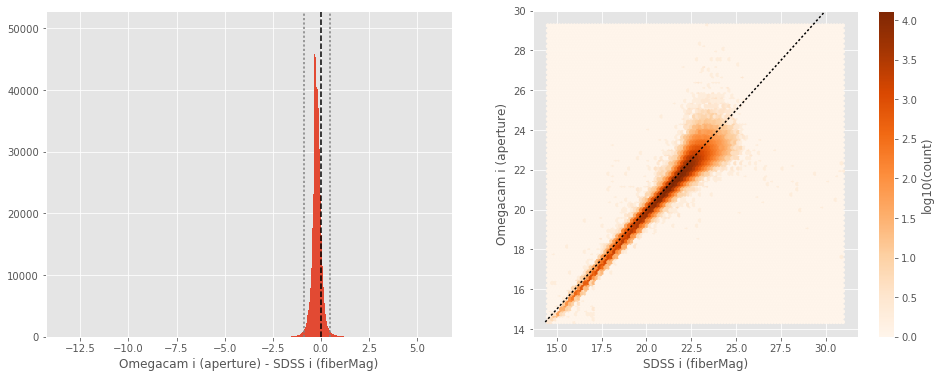

Omegacam i (total) - SDSS i (petroMag):
- Median: 0.01
- Median Absolute Deviation: 0.17
- 1% percentile: -3.094964065551758
- 99% percentile: 1.3094437789917004


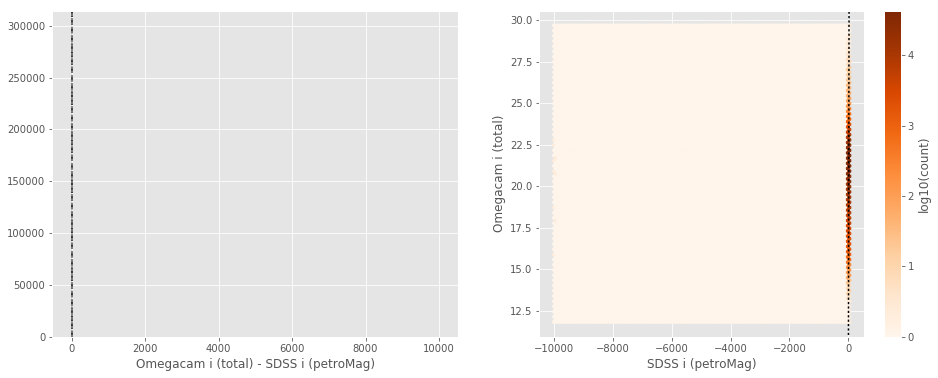

SUPRIME i (aperture) - SDSS i (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.12
- 1% percentile: -0.9200061035156251
- 99% percentile: 0.5815077590942384


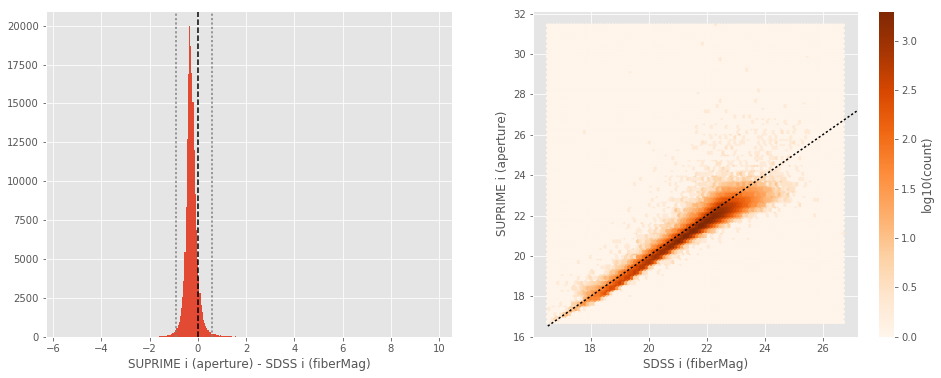

SUPRIME i (total) - SDSS i (petroMag):
- Median: -0.12
- Median Absolute Deviation: 0.17
- 1% percentile: -3.2976397705078124
- 99% percentile: 1.0475211334228498


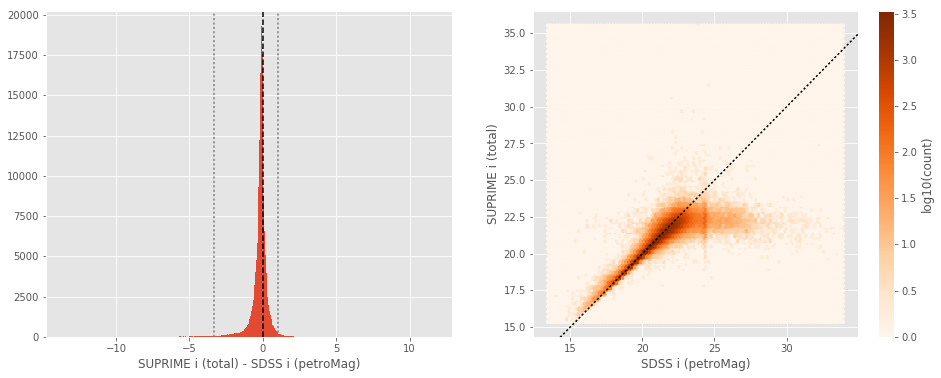

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.39
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1198129272460937
- 99% percentile: 0.5794070434570271


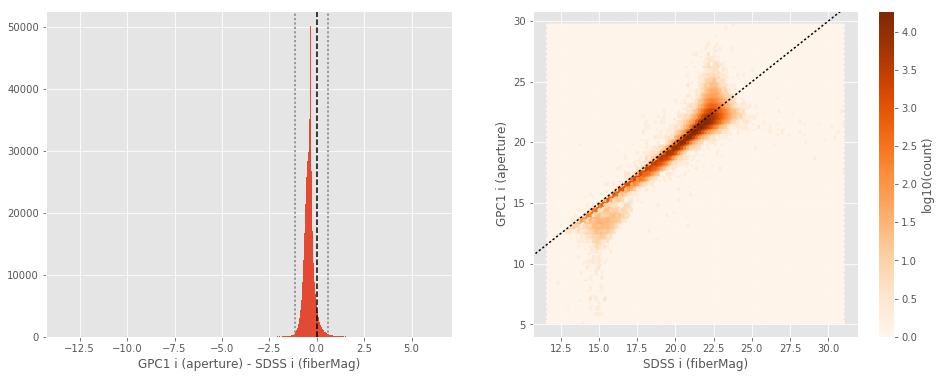

GPC1 i (total) - SDSS i (petroMag):
- Median: 0.06
- Median Absolute Deviation: 0.14
- 1% percentile: -2.520841598510742
- 99% percentile: 0.9990177154540998


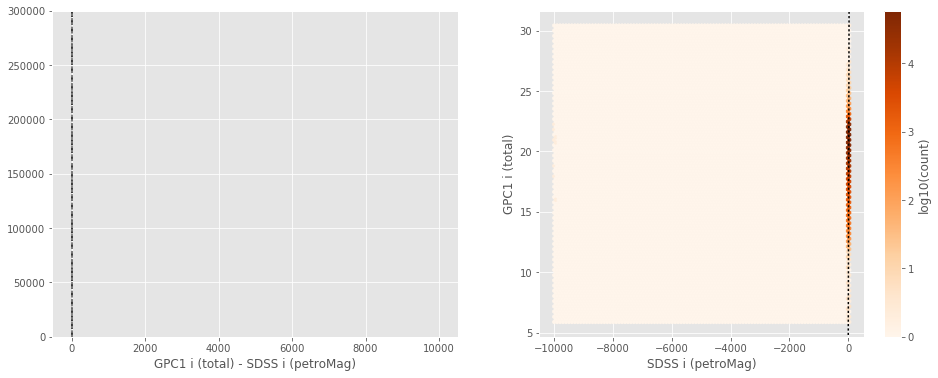

DECam z (aperture) - SDSS z (fiberMag):
- Median: -0.42
- Median Absolute Deviation: 0.18
- 1% percentile: -1.3981916618347168
- 99% percentile: 1.1099197769164975


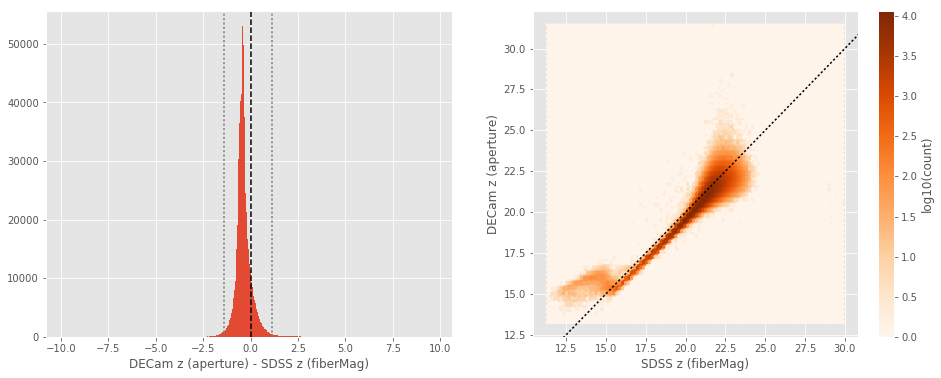

DECam z (total) - SDSS z (petroMag):
- Median: -0.11
- Median Absolute Deviation: 0.34
- 1% percentile: -4.015387382507324
- 99% percentile: 1.7345678901672361


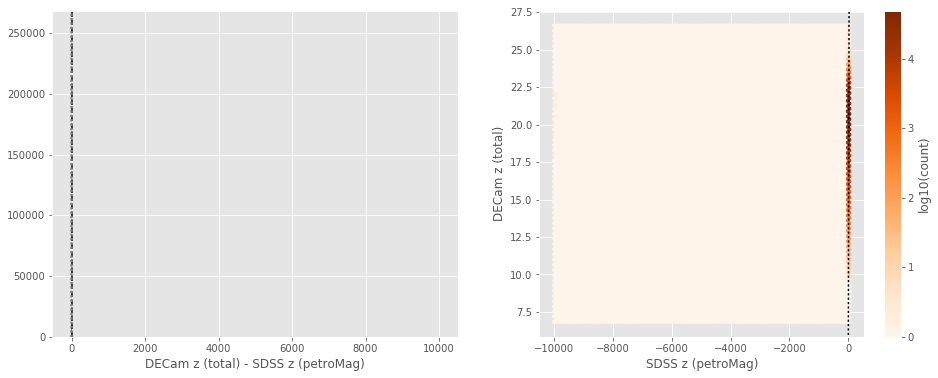

SUPRIME z (aperture) - SDSS z (fiberMag):
- Median: -0.17
- Median Absolute Deviation: 0.19
- 1% percentile: -1.1570728683471678
- 99% percentile: 1.0003003501892096


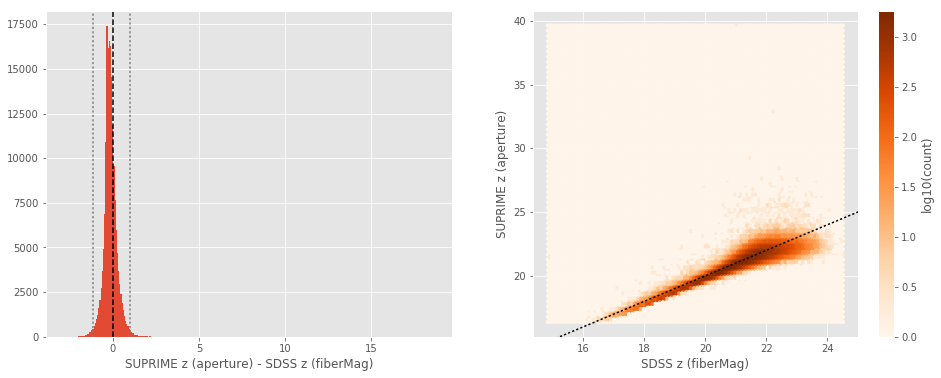

SUPRIME z (total) - SDSS z (petroMag):
- Median: -0.03
- Median Absolute Deviation: 0.35
- 1% percentile: -3.8091509246826174
- 99% percentile: 1.8075714111328063


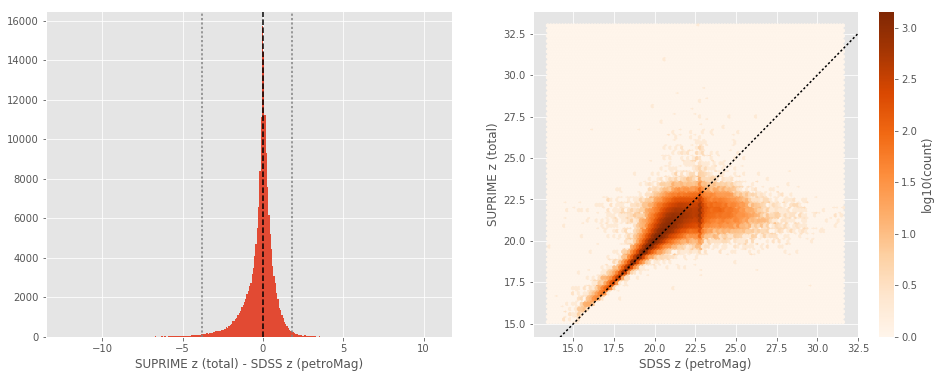

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.18
- 1% percentile: -1.3754301261901856
- 99% percentile: 0.9457995605468756


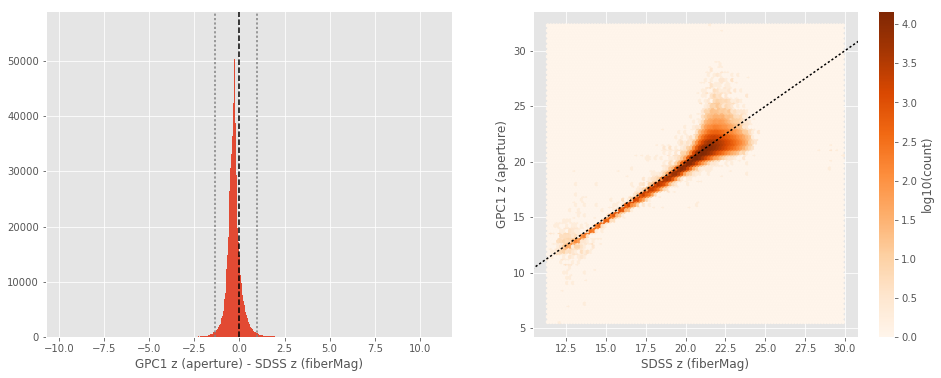

GPC1 z (total) - SDSS z (petroMag):
- Median: 0.11
- Median Absolute Deviation: 0.30
- 1% percentile: -3.7913813781738277
- 99% percentile: 1.6743761825561518


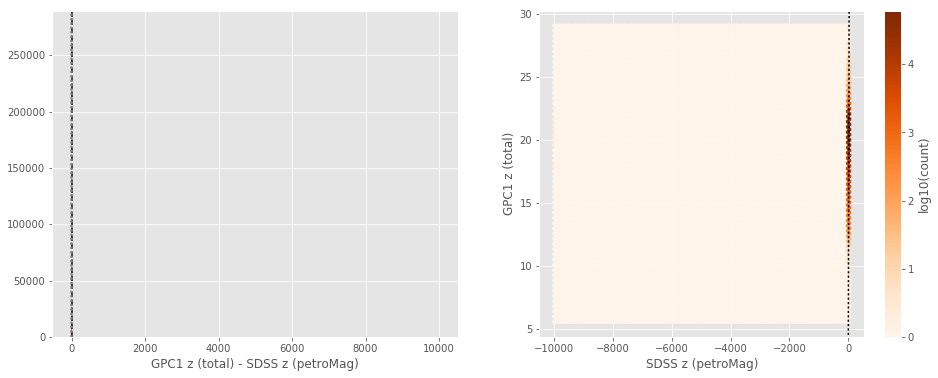

In [14]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        # SDSS use negative magnitudes to indicate missing data
        sdss_mag_ap[sdss_mag_ap < 0] = np.nan
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_tot, master_cat_mag_tot,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [15]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [16]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_GAMA-12.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS J (total) - 2MASS J:
- Median: 0.06
- Median Absolute Deviation: 0.06
- 1% percentile: -0.82272788390177
- 99% percentile: 0.7281288665865127


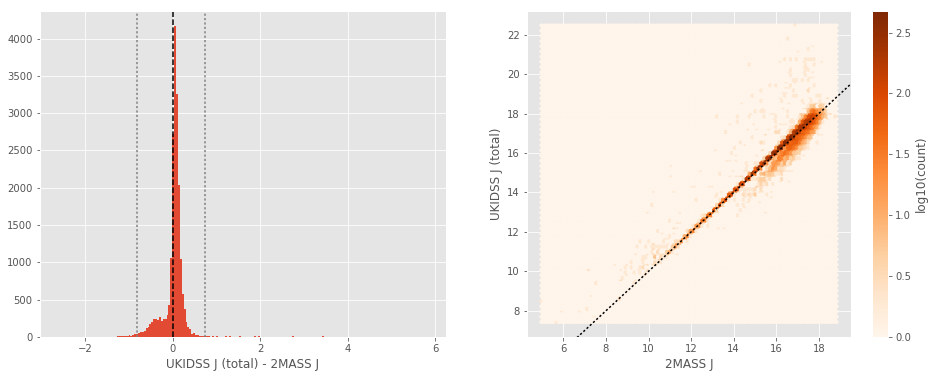

In [17]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_ukidss_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

UKIDSS Ks-like (total) - 2MASS Ks:
- Median: 0.11
- Median Absolute Deviation: 0.10
- 1% percentile: -0.8383912190111664
- 99% percentile: 1.1027035285321665


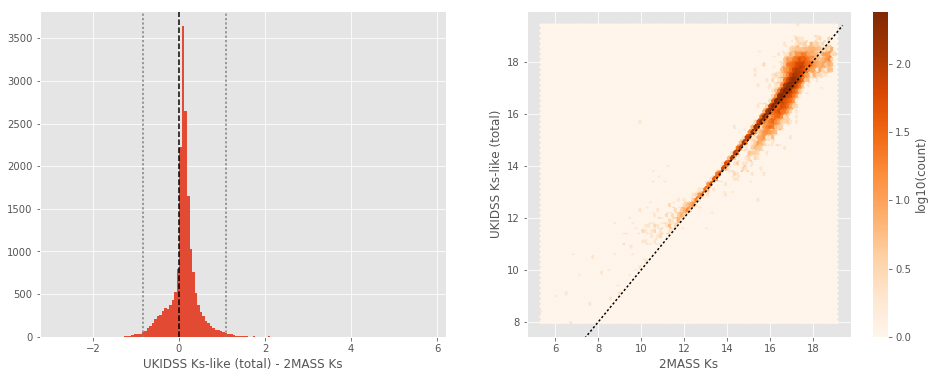

In [18]:
ukidss_ks_like = master_catalogue['m_ukidss_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "UKIDSS Ks-like (total)"))

VISTA J (total) - 2MASS J:
- Median: 0.02
- Median Absolute Deviation: 0.08
- 1% percentile: -1.160277298498327
- 99% percentile: 1.0473052539156118


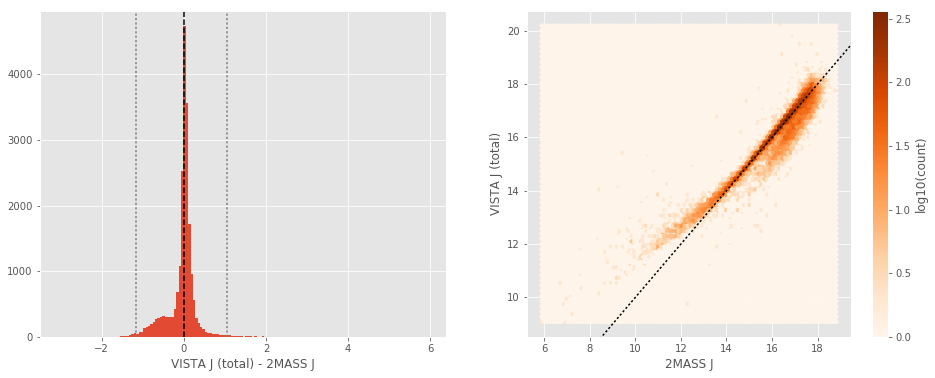

In [19]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_vista_j'][ml_twomass_idx],
                labels=("2MASS J", "VISTA J (total)"))

VISTA Ks (total) - 2MASS Ks:
- Median: 0.05
- Median Absolute Deviation: 0.14
- 1% percentile: -1.0731860493334318
- 99% percentile: 1.219176158231873


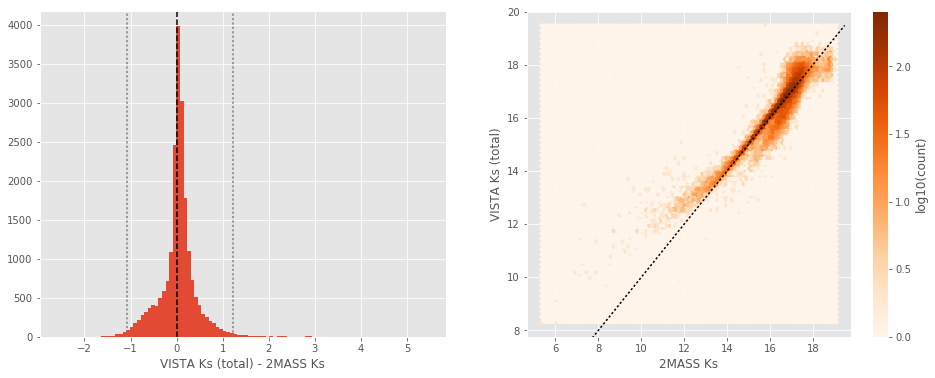

In [20]:
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, master_catalogue['m_vista_ks'][ml_twomass_idx],
                labels=("2MASS Ks", "VISTA Ks (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 4366603 / 12369415 (35.30%)


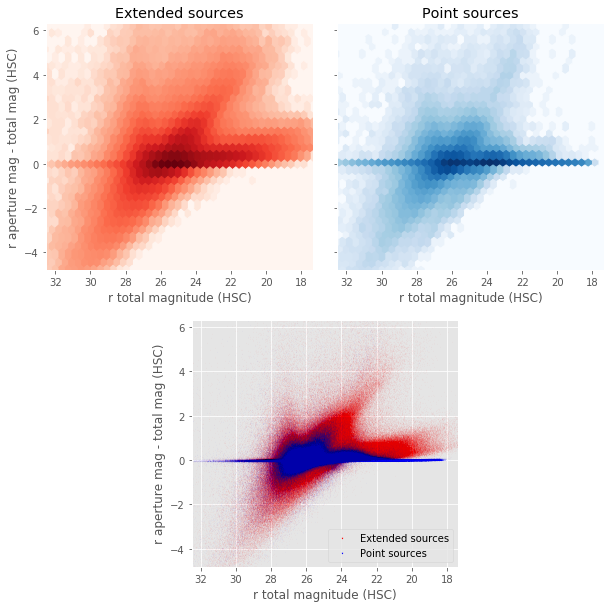

In [21]:
nb_ccplots(
    master_catalogue['m_suprime_r'],
    master_catalogue['m_ap_suprime_r'] - master_catalogue['m_suprime_r'],
    "r total magnitude (HSC)", "r aperture mag - total mag (HSC)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 37754 / 12369415 (0.31%)


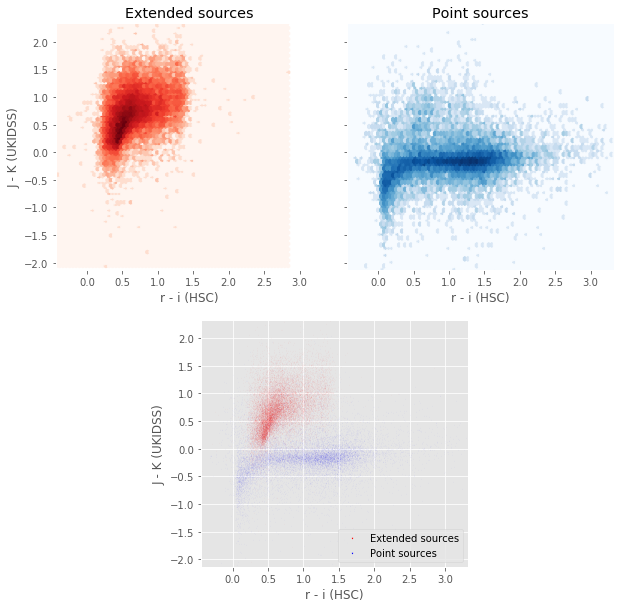

In [22]:
nb_ccplots(
    master_catalogue['m_suprime_r'] - master_catalogue['m_suprime_i'],
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    "r - i (HSC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 37754 / 12369415 (0.31%)


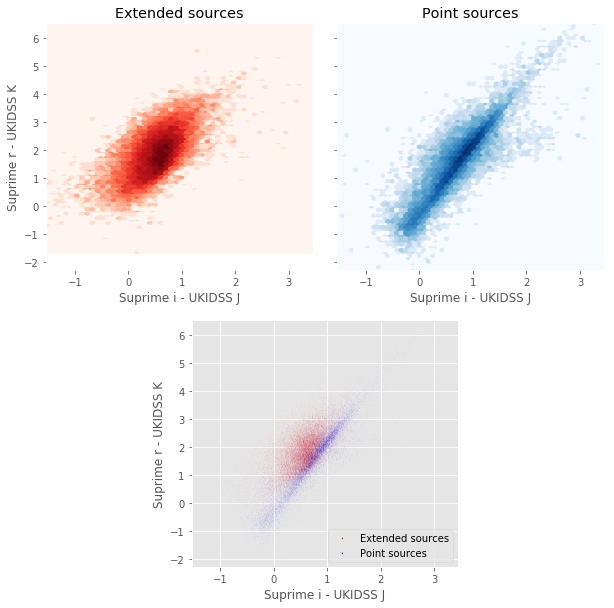

In [23]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_ukidss_j'],
    master_catalogue['m_suprime_r'] - master_catalogue['m_ukidss_k'],
    "Suprime i - UKIDSS J", "Suprime r - UKIDSS K",
    master_catalogue["stellarity"]
)

Number of source used: 37757 / 12369415 (0.31%)


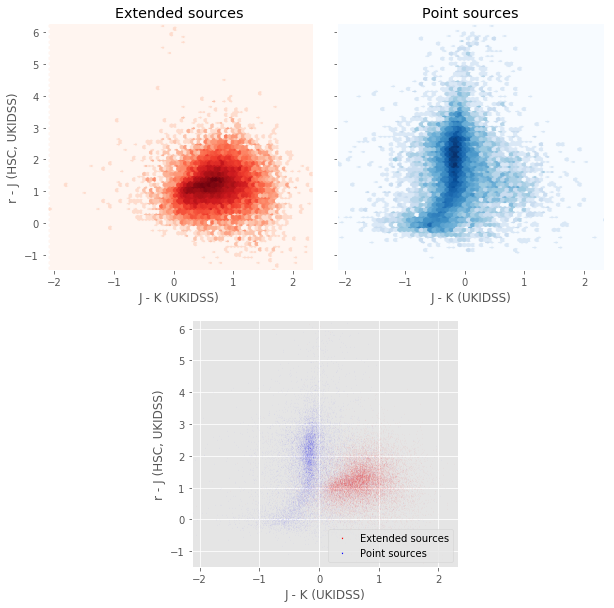

In [24]:
nb_ccplots(
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    master_catalogue['m_suprime_r'] - master_catalogue['m_ukidss_j'],
    "J - K (UKIDSS)", "r - J (HSC, UKIDSS)",
    master_catalogue["stellarity"]
)